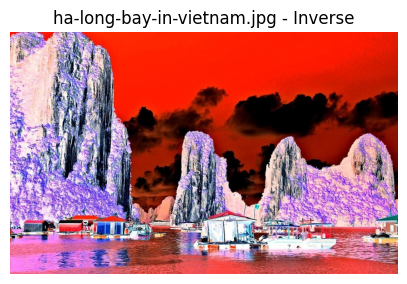

C:\Users\hungl\AppData\Local\Temp\ipykernel_11560\1220568327.py:27: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
C:\Users\hungl\AppData\Local\Temp\ipykernel_11560\1220568327.py:27: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
C:\Users\hungl\AppData\Local\Temp\ipykernel_11560\1220568327.py:28: RuntimeWarning: divide by zero encountered in log
  log_img = c * (np.log(img + 1))
C:\Users\hungl\AppData\Local\Temp\ipykernel_11560\1220568327.py:28: RuntimeWarning: invalid value encountered in multiply
  log_img = c * (np.log(img + 1))
C:\Users\hungl\AppData\Local\Temp\ipykernel_11560\1220568327.py:29: RuntimeWarning: invalid value encountered in cast
  return np.uint8(log_img)


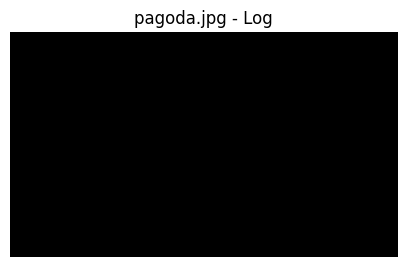

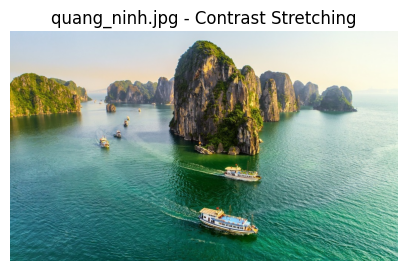

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random

def get_image_files(folder):
    exts = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')
    return [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(exts)]

def show_img(title, img):
    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_norm = img / 255.0
    img_gamma = np.power(img_norm, gamma)
    return np.uint8(img_gamma * 255)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * (np.log(img + 1))
    return np.uint8(log_img)

def histogram_equalization(img):
    # Áp dụng cho từng kênh màu
    channels = cv2.split(img)
    eq_channels = [cv2.equalizeHist(ch) for ch in channels]
    return cv2.merge(eq_channels)

def contrast_stretching(img):
    a = np.min(img)
    b = np.max(img)
    stretched = (img - a) * (255 / (b - a))
    return np.uint8(stretched)

# Danh sách các phép biến đổi
transformations = [
    ("Inverse", image_inverse),
    ("Gamma", lambda img: gamma_correction(img, gamma=random.uniform(1.5, 3.0))),
    ("Log", log_transformation),
    ("Histogram Equalization", histogram_equalization),
    ("Contrast Stretching", contrast_stretching)
]

folder = 'exercise'
output_folder = 'exercise_output'
os.makedirs(output_folder, exist_ok=True)
image_files = get_image_files(folder)

for img_path in image_files:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Không thể đọc ảnh: {img_path}")
        continue

    # Chọn phép biến đổi ngẫu nhiên
    trans_name, trans_func = random.choice(transformations)

    # Áp dụng cho từng kênh màu nếu không phải histogram equalization
    if trans_name == "Histogram Equalization":
        img_trans = trans_func(img)
    else:
        channels = cv2.split(img)
        new_channels = [trans_func(ch) for ch in channels]
        img_trans = cv2.merge(new_channels)

    # Lưu và hiển thị
    out_path = os.path.join(output_folder, f"{os.path.splitext(os.path.basename(img_path))[0]}_{trans_name}.jpg")
    cv2.imwrite(out_path, img_trans)
    show_img(f"{os.path.basename(img_path)} - {trans_name}", img_trans)